In [43]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [322]:
# Visualization

def RotateVec( u, angle ):
    R = np.array([[np.cos(angle), -np.sin(angle)], [np.sin(angle), np.cos(angle)]])
    if np.shape( u ) != [2,1]:
        np.reshape(u, (2,1))
    return np.dot(R, u)
    
def PlotVec( v, show=False, c='k' ):
    plt.plot([0, v[0]], [0, v[1]], color=c)
    if show:
        plt.show()


In [195]:
class DistanceLearn:
    class Visualization:
        def RotateVec(self, u, angle ):
            R = np.array([[np.sin(angle), -np.cos(angle)], [np.cos(angle), np.sin(angle)]])
            if np.shape( u ) != [2,1]:
                np.reshape(u, (2,1))
            return np.dot(R, u)
    
        def PlotVec(self, v, ax="none", show=False ):
            if isinstance(ax, basestring):
                plt.plot([0, v[0]], [0, v[1]], 'k')
                plt.xlim([0,1])
                plt.ylim([0,1])
                if show:
                    plt.show()
            else:
                ax.plot([0, v[0]], [0, v[1]], 'k')
                ax.set_xlim([0,1])
                ax.set_ylim([0,1])

    
    def Stim2Cell(self, S ):
        """
        Input
        S :  Stimulus vectors (each col is a stimulus)
        
        Return
        C :  Cell vectors (each col is a cell)
        """
        
        self.n_stim = np.shape(S)[1]
        self.n_cell = np.shape(S)[0]
        """
        S_flat = S.flatten(order='F')
        S_flat = np.reshape( S_flat, (len(S_flat), 1) )
        C = []
        for i in range(self.n_cell):
            m = np.zeros( (self.n_cell, len(S_flat)) )
            for j in range(self.n_stim):
                m[j, i + j*self.n_cell] = 1
            c = np.dot(m, S_flat)
            C.append(c)
        C = np.array(C)[:,:,0].T
        """
        return S.T
    
    def Cell2Stim( self, C ):
        return C.T
    
    def GenerateRotationMatrix( self, angle ):
        R = np.array([[np.cos(angle), -np.sin(angle)], [np.sin(angle), np.cos(angle)]])
        return R
    
    def AdjustCells(self, C, D ):
        """
        Input:
        C :  Cell vectors (each col is a cell)
        D :  Distance matrix
        
        Return:
        C_p:  Adjusted cell vectors
        """
        self.n_cell = np.shape(C)[1]
        self.n_stim = np.shape(C)[0]
        C_p = np.zeros((np.shape(C)))
        for i in range(self.n_stim):
            for j in range(i,self.n_stim):
                if (i == j):
                    continue
                for k in range(self.n_cell):
                    theta = np.arccos( D[i,j] )
                    phi = np.arccos( C[i,k]/np.linalg.norm(C[:,k]) )
                    phi_p = (2 * theta * phi)/np.pi
                    alpha = ((np.pi/2) - theta)/2
                    var_phi = phi_p + alpha
                    delta =  var_phi - phi
                    R = self.GenerateRotationMatrix( delta )
                    C_p[:,k] = np.dot(R, C[:,k])
        return C_p
        
        
    def GeneralAdjustCells( self, C, D ):
        self.n_cell = np.shape(C)[1]
        self.n_stim = np.shape(C)[0]
        C_p = np.zeros((np.shape(C)))
        for i in range(self.n_stim):
            for j in range(i, self.n_stim):
                if (i==j):
                    continue
                for k in range(self.n_cell):
                    
    
    def AdjustStim( self, S, D, vis=False ):
        C = self.Stim2Cell( S )
        C_p = self.AdjustCells( C, D )
        S_p = self.Cell2Stim( C_p )
        
        if vis:
            V = self.Visualization()
            f, (ax1, ax2) = plt.subplots(1, 2, sharey=True)
            plt.title("cell space")
            for i in range(self.n_stim):
                V.PlotVec(S[:,i], ax=ax1 )
                V.PlotVec(S_p[:,i], ax=ax2)
        return S_p

        
    
    

[[ 0.45229121  0.66740742]
 [ 0.58402422  0.43464434]]
[ 0.32482955  0.69391005]


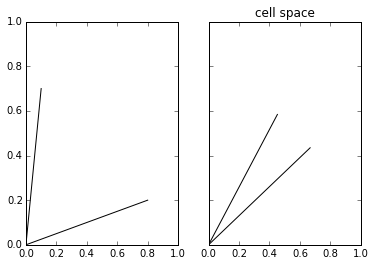

In [357]:
# 2 stimuli, 2 cells
dl = DistanceLearn()
S = np.array([[.1,.8],
              [.7, .2]])
D = np.ones((2,2)) * .9
S_p=dl.AdjustStim(S, D, vis=True)
print(S_p)

a = (np.pi/2 - .9)/2
A = np.eye(2)
A[:,0] = RotateVec(A[:,0], a)
A[:,1] = RotateVec(A[:,1], -a)

print(np.dot(A.T,S[:,0]))

In [350]:
# 2 stimuli, 1 cell
dl = DistanceLearn()
S = np.array([[.3,.8]])
D = np.ones((2,2)) * .9
S_p=dl.AdjustStim(S, D, vis=False)



print(S_p)

ValueError: total size of new array must be unchanged

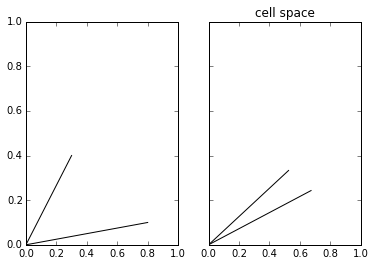

In [228]:
# 2 stimuli, 3 cell
dl = DistanceLearn()
S = np.array([[.3,.8],
              [.4, .1],
              [.9, .2]])
D = np.ones((3,3)) * .9
S_p=dl.AdjustStim(S, D, vis=True)

orig
[[ 0.2  0.4]
 [ 0.1  0.8]
 [ 0.5  0.1]]

 change 1,2
[[ 0.19337356  0.44911765]
 [ 0.11227941  0.77349424]
 [ 0.5         0.1       ]]

 change 1,3
[[ 0.29134819  0.40409021]
 [ 0.11227941  0.77349424]
 [ 0.45001063  0.22004037]]

 change 2,3
[[ 0.29134819  0.40409021]
 [ 0.24786508  0.67390602]
 [ 0.39201931  0.43881862]]


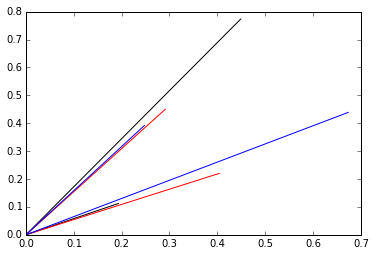

In [263]:
S = np.array([[.2, .1, .5],
              [.4, .8, .1]])
C = S.T
print("orig")
print(C)

C_p = dl.AdjustCells( C[[0,1],:], np.reshape( np.array([0,.3]), (1,2) ) )
PlotVec(C_p[[0,1],0])
PlotVec(C_p[[0,1],1])
C_n = C.copy()
C_n[[0,1],:] = C_p
print("\n change 1,2")
print(C_n)

C_p = dl.AdjustCells( C_n[[0,2],:], np.reshape( np.array([0,.7]), (1,2) ) )
PlotVec(C_p[[0,1],0],c='r')
PlotVec(C_p[[0,1],1],c='r')
C_n[[0,2],:] = C_p
print("\n change 1,3")
print(C_n)

C_p = dl.AdjustCells( C_n[[1,2],:], np.reshape( np.array([0,.8]), (1,2) ) )
PlotVec(C_p[[0,1],0],c='b')
PlotVec(C_p[[0,1],1],c='b')
C_n[[1,2],:] = C_p
print("\n change 2,3")
print(C_n)


orig
[[ 0.2  0.4]
 [ 0.1  0.8]
 [ 0.5  0.1]]

 change 1,2
[[ 0.19337356  0.44911765]
 [ 0.11227941  0.77349424]
 [ 0.          0.        ]]
[ 1.51522732]
[ nan]
1.19275395065


/home/rabadi/.local/lib/python2.7/site-packages/ipykernel/__main__.py:19: RuntimeWarning: invalid value encountered in arccos


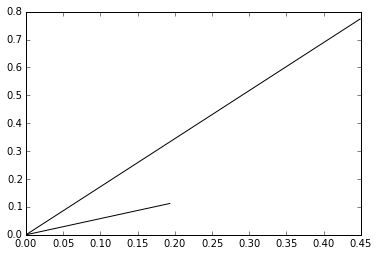

In [272]:
S = np.array([[.2, .1, .5],
              [.4, .8, .1]])
C = S.T
print("orig")
print(C)

C_p = dl.AdjustCells( C[[0,1],:], np.reshape( np.array([0,.3]), (1,2) ) )
PlotVec(C_p[[0,1],0])
PlotVec(C_p[[0,1],1])
C_n = C.copy()
C_n[[0,1],:] = C_p
print("\n change 1,2")
print(C_n)



In [349]:
S = np.eye(3)
G = np.eye(3)
d12 = .3
d23 = .8
d13 = .7


a = (np.pi/2 - d12)/2

S[:2,0] = RotateVec(S[:2,0], a)
S[:2,1] = RotateVec(S[:2,1], -a)

R = np.array([[np.cos(a), -np.sin(a), 0],
              [np.sin(a), np.cos(a), 0],
              [0, 0, 1]])

G[:,0] = np.dot(R, G[:,0])
print(G)

test = np.dot(np.array([[np.cos(d13), np.cos(d23)]]), np.linalg.inv(S[[0,1],:2]))
S[:2,2] = test
print(S)
S[2,2] = 1 - np.linalg.norm(S[:2,2])

print(S)
print(np.arccos(np.dot(S[:,0],S[:,1])))
print(np.arccos(np.dot(S[:,1],S[:,2])))
print(np.arccos(np.dot(S[:,0],S[:,2])))


[[ 0.80483545  0.          0.        ]
 [ 0.59349802  1.          0.        ]
 [ 0.          0.          1.        ]]
[[ 0.80483545  0.59349802  0.68380453]
 [ 0.59349802  0.80483545  0.36140316]
 [ 0.          0.          1.        ]]
[[ 0.80483545  0.59349802  0.68380453]
 [ 0.59349802  0.80483545  0.36140316]
 [ 0.          0.          0.22656553]]
0.3
0.8
0.7


0.81731411458591774